## URL & Permalink

<br>

- URL의 기본 구조?

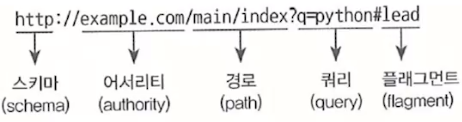

    schema : http 또는 https 같은 프로토콜.
    authority : 도메인 명(논리주소):포트번호
    path : 호스트 내부에서의 리소스 경로
    query : ? 뒤에 나오는 경로와는 다른 방법으로 리소스를 표현하는 방법.
            ?page=2 이런거
    flagment : # 뒤에 나오는 리소스 내부의 특정 부분

### 절대 URL, 상대 URL

<br>

- 절대 URL : https:// 등의 스키마로 시작하는 URL.
- 상대 URL : 절대 URL을 기준으로 상대적인 경로를 잡는 URL. 3가지 형식이 있음.
    - // 로 시작하는 상대 URL
    - / 로 시작하는 상대 URL
    - 그 밖의 상대경로 형식을 사용하는 상대 URL

- 상대 URL을 절대 URL로 변환?
    - urllib.parse 모듈에 있는 urljoin() 함수를 사용.
        - 첫번째 매개변수에 기준이 되는 URL 지정, 두번째 매개변수에 상대 URL 지정.

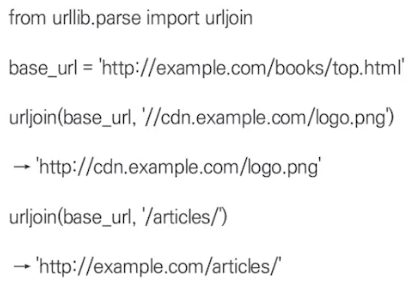

                                        이런식으로.


## Permalink

<br>

- 불변 (Pernamanent) + Link 의 조합.
- 하나의 콘텐츠에 대응, 시간이 흘러도 대응되는 콘텐츠가 변하지 않는 URL 로 생각하면 됨.
- 퍼머링크를 가진 웹사이트는 검색엔진의 크롤러가 콘텐츠 인식을 하는데 용이함.
- 페이스북, 트위터 등의 소셜 미디어에 콘텐츠를 공유할때도 사용 가능. 많은 웹사이트가 퍼머링크를 사용 중.

## 목록/상세 패턴

<br>

- 퍼머링크를 사용하는 웹사이트는 대부분 **퍼머링크를 가진 페이지로 연결되는 링크가 목록으로 존재**.
- **목록 페이지와 상세 페이지의 조합으로 구성**되어 있는 웹사이트의 링크 구조 패턴.
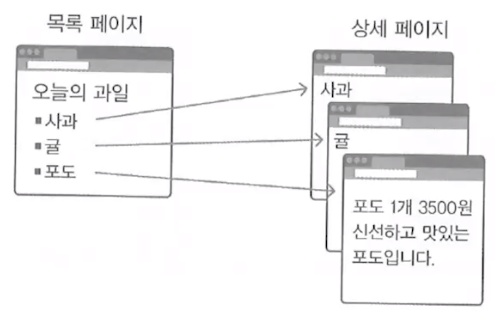


## 웹 페이지 추출?

<br>

- 웹 페이지 추출 시 HTTP 헤더, HTML의 meta태그를 기반으로 해당 페이지(문서)의 인코딩 방식 판별이 필요함.
    - **어떤 인코딩 형식으로 되어있는지 보여달라 요청**하는 셈. 이걸 먼저 해줘야 한다.
- 보통은 **urllib.request** 모듈을 이용. 그 안의 **urlopen()** 함수에 url을 지정해주면 웹 페이지 추출이 가능하다.
- HTTP 헤더 변경 및 Basic 인증을 위해 urllib대신 Requests라는 모듈의 사용이 또 필요함.

In [4]:
from urllib.request import urlopen
f = urlopen('http://comic.naver.com')
print(type(f)) # HTTPResponse 객체.
f.read() # 응답으로 받은내용을 볼 수 있음.

<class 'http.client.HTTPResponse'>


b'\r\n\r\n\r\n  \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n<!DOCTYPE html>\r\n<html lang="ko">\r\n<head>\r\n\t\r\n\t\t\r\n\t\t\r\n\t\t\r\n\t\t\r\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\r\n\t\t\r\n\t<meta http-equiv="Content-type" content="text/html; charset=UTF-8">\r\n\t<title>\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa7\x8c\xed\x99\x94</title>\r\n\t\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n        <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xec\x9b\xb9\xed\x88\xb0" >\r\n        <meta property="og:image" content="https://ssl.pstatic.net/static/comic/images/og_tag_v2.png" >\r\n        <meta property="og:description" content="\xeb\xa7\xa4\xec\x9d\xbc\xeb\xa7\xa4\xec\x9d\xbc \xec\x83\x88\xeb\xa1\x9c\xec\x9a\xb4 \xec\x9e\xac\xeb\xaf\xb8, \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xec\x9b\xb9\xed\x88\xb0.">\r\n    \r\n\r\n\r\n<me

In [5]:
f.getheader('Content-Type') # 헤더 정보를 반환. 인코딩 형식은 뭐로 되어있는지 확인 가능.

'text/html;charset=UTF-8'

In [20]:
# 대상 url을 지정한 다음, HTTP 헤더 기반으로 인코딩 방식을 추출해보자.
f = urlopen('http://comic.naver.com/webtoon/weekday')
print(f.getheader('Content-Type')) 

encoding = f.info().get_content_charset(failobj='utf-8')
print(encoding)

# 추출한 인코딩 방식으로 f를 디코딩 해보자.
text = f.read().decode(encoding)
text

text/html;charset=UTF-8
utf-8


'\r\n\r\n\r\n  \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n<!DOCTYPE html>\r\n<html lang="ko">\r\n<head>\r\n\t\r\n\t\t\r\n\t\t\r\n\t\t\r\n\t\t\r\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\r\n\t\t\r\n\t<meta http-equiv="Content-type" content="text/html; charset=UTF-8">\r\n\t<title>네이버 만화 > 요일별  웹툰 > 전체웹툰</title>\r\n\t\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n        <meta property="og:title" content="네이버 웹툰" >\r\n        <meta property="og:image" content="https://ssl.pstatic.net/static/comic/images/og_tag_v2.png" >\r\n        <meta property="og:description" content="매일매일 새로운 재미, 네이버 웹툰.">\r\n    \r\n\r\n\r\n<meta property="og:url" content="https://comic.naver.com/webtoon/weekday" >\r\n<meta property="og:type" content="article" >\r\n<meta property="og:article:author" content="네이버 웹툰" >\r\n<meta property="og:article:author:url" content="https://comic.naver

In [22]:
# 읽은거로 URL을 한번 뽑아보자.
# 파일로 저장해서 읽어와야하나... 그냥 f.read()하면 아무겂도 없네.
# html1 = f.read().decode(enco)
# print(type(html1))
import re
from html import unescape
with open('UseData/navercomic.html', encoding='utf-8') as f1:
    print(type(f1))
    html = f1.read()
html # url로 읽어오는거랑 파일로 읽어오는거랑 차이가 뭐지.

<class '_io.TextIOWrapper'>


'\n\n\n  \n\n\n\n\n\n\n\n<!DOCTYPE html>\n<html lang="ko">\n<head>\n\t\n\t\t\n\t\t\n\t\t\n\t\t\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t\t\n\t<meta http-equiv="Content-type" content="text/html; charset=UTF-8">\n\t<title>네이버 만화 > 요일별  웹툰 > 전체웹툰</title>\n\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    \n    \n    \n    \n    \n    \n    \n    \n    \n    \n    \n        <meta property="og:title" content="네이버 웹툰" >\n        <meta property="og:image" content="https://ssl.pstatic.net/static/comic/images/og_tag_v2.png" >\n        <meta property="og:description" content="매일매일 새로운 재미, 네이버 웹툰.">\n    \n\n\n<meta property="og:url" content="https://comic.naver.com/webtoon/weekday" >\n<meta property="og:type" content="article" >\n<meta property="og:article:author" content="네이버 웹툰" >\n<meta property="og:article:author:url" content="https://comic.naver.com" >\n\n\t<link rel="shortcut icon" href="https://ssl.pstatic.net/static/comic/favicon/webtoon_favicon_32x32.ico" type="i

In [23]:
# re.findall을 통해 웹툰목록 1개에 해당하는 html 문서 추출.
for partial_html in re.findall(r'<td class="left"><a.*?</td>', html, re.DOTALL):
    # URL 추출
    url = re.search(r'<a href="(.*?)">', partial_html).group(1)
    url = 'http://comic.naver.com/webtoon/weekday' + url
    
    # 태그 제거 후 웹툰 목록 추출
    webtoonTitle = re.sub(r'<.*?>', '', partial_html)
    webtoonTitle = unescape(title)
    
    print('웹툰 주소 : ', url)
    print('작품 이름 : ', webtoonTitle)
    print('\n')

In [25]:
re.findall(r'<div class="list_area daily_all"><a.*?</td>', html, re.DOTALL)

[]

    음 어떻게하징...